# 3. Machine Learning for Classification

We'll use logistic regression to predict churn

## 3.1 Churn Prediction Project

- Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
- https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

## 3.2 Data Preparation

- Download the data, read it with pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data url
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
# If data is not in the directory
# download it as 'churn-data.csv'
if not os.path.isfile('churn-data.csv'):
    !wget $data -O churn-data.csv

In [4]:
df = pd.read_csv('churn-data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Transpose df to view all columns
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
# Make columns names and values look uniform
df.columns = df.columns.str.lower().str.strip()

categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [7]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
# Check datatypes of all columns
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
# Convert data type of 'totalcharges' from string to numeric
# pass errors='coerce' to set not parsable values to null
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
# Check missing values in 'totalcharges'
df.totalcharges.isnull().sum()

11

In [11]:
# Fill missing values of 'totalcharges' with 0
df.totalcharges = df.totalcharges.fillna(0)

# Check missing values again
df.totalcharges.isnull().sum()

0

In [12]:
# View 'churn' values
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [13]:
# Convert 'churn' values to int
df.churn = (df.churn == 'yes').astype(int)

## 3.3 Setting Up the Validation Framework

In [14]:
from sklearn.model_selection import train_test_split

# Split train (80%), test (20%)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
# Split train (60%), validation (20%)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [15]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [16]:
# Reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
# Create target variable 'churn' for train, validation, test sets
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [18]:
# Delete target varaible 'churn' from train, validation, test sets
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA

- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [19]:
# Reset index of 'df_full_train'
df_full_train = df_full_train.reset_index(drop=True)

In [20]:
# Check missing values
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [21]:
# Check distribution of the target vairable 'churn'
# normalize=True will return the percentage of the distribution
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

When we calculate the mean of a binary column, when get the mean which is the fraction of 1's, since the column only consists of values 0's and 1's.

In [22]:
# Calculate the mean of churn, is this called 'global churn rate'
df_full_train.churn.mean()

0.26996805111821087

In [23]:
# Check the data types of the columns in 'df_full_train'
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

Note: column `seniorcitizen` is a categorical column not the numerical because it consists of values 0 and 1. The numerical columns are `tenure`, `monthlycharges`, and `totalcharges`.

In [24]:
# Create a list of numerical cols
numerical_cols = ['tenure', 'monthlycharges', 'totalcharges']

In [25]:
# Create a list of categorical cols
categorical_cols = ['gender', 'seniorcitizen', 'partner',
                    'dependents', 'phoneservice', 'multiplelines',
                    'internetservice', 'onlinesecurity', 'onlinebackup',
                    'deviceprotection', 'techsupport', 'streamingtv',
                    'streamingmovies', 'contract', 'paperlessbilling',
                    'paymentmethod']

In [26]:
# Find the number of unique values in 'categorical_cols'
df_full_train[categorical_cols].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature Importance: Chrun Rate and Risk Ratio

Feature importance analysis (part of EDA) - identifying which features affect our target vairable.

- Churn rate
- Risk ratio
- Mutual information - later

### Churn Rate

In [27]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [28]:
# Calculate global churn rate
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [29]:
# Calculate churn rate in 'female' gender
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [30]:
# Calculate the difference between 'female churn' and 'global churn' rate
churn_female - global_churn

0.006855983216553063

In [31]:
# Calculate churn rate in 'male' gender
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [32]:
# Calculate the difference between 'male churn' and 'global churn' rate
churn_male - global_churn

-0.006754520462819769

In [33]:
# Find distribution in 'partner'
df_full_train['partner'].value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [34]:
# Calculate churn rate of people with partner
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [35]:
# Calculate the difference between 'churn_partner' and 'global_churn' rate
churn_partner - global_churn

-0.06493474245795922

In [36]:
# Calculate churn rate of people without partner
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [37]:
# Calculate the difference between 'churn_no_partner' and 'global_churn' rate
churn_no_partner - global_churn

0.05984095297455855

### Risk Ratio

In [38]:
# Calculate the churn risk ratio of people without partner
churn_no_partner / global_churn

1.2216593879412643

In [39]:
# Calculate the churn risk ratio of people with partner
churn_partner / global_churn

0.7594724924338315

If we want to calculate the churn **difference** and **ratio** between `gender` in the `df_train_full` data using SQL, the query will look like this:

```sql
SELECT gender,
       AVG(churn),
       AVG(churn) - global_churn AS diff,
       AVG(churn) / global_churn AS risk
FROM data
GROUP BY gender;
```

We can write the above query in Pandas using `groupby()` method. 

In [40]:
# Groupby 'gender' to calculate the churn 'mean', 'count',
# 'difference' and 'risk'
df_group = df_full_train.groupby('gender')['churn'].agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [41]:
# Calculate the above aggregation for all the variables in
# 'df_full_train'
for c in categorical_cols:
    print(c)
    df_group = df_full_train.groupby(c)['churn'].agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 3.6 Feature Importance: Mutual Information

Mutual information - concept from information theory. It tells us how much we can learn about one variable if we know the value of another.

- https://en.wikipedia.org/wiki/Mutual_information

In [42]:
from sklearn.metrics import mutual_info_score

In [43]:
# Calculate mutual info score between 'churn' and 'contract'
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [44]:
# Calculate mutual info score between 'churn' and 'gender'
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [45]:
# Calculate mutual info score between 'churn' and 'partner'
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [46]:
# Define function to calculate mutual information score of all
# categorical variables in 'df_full_train'
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [47]:
# Apply the above function on 'categorical cols' of 'df_full_train'
mutual_info = df_full_train[categorical_cols].apply(mutual_info_churn_score)

# Sort 'mutual_info' values in descending order
mutual_info.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

We can tell from the above results that `contract`, `onlinesecurity`, `techsupport`, `internetservice`, `onlinebackup`, `deviceprotection`, and `paymentmethod` are important categorical variables to prediction the churning.

## 3.7 Feature Importance: Correlation

How to find relationship between numerical columns with churn rate?

- Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [48]:
# Calculate correlation of numerical columns with 'churn' in
# 'df_full_train'
df_full_train[numerical_cols].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

Let's interpret the results above:

- `tenure` has moderate negative relationship with `churn`, means when the tenure increases it is less likely that customer will churn
- `monthlycharges` has low positive relationship with `churn`. Means it is not effect on churn rate
- `totalcharges` has low negative relationship with `churn`. Means it is not effect on churn rate

In [49]:
# Calculate churn rate for 'tenure' less than 2 months
df_full_train[df_full_train['tenure'] <= 2].churn.mean()

0.5953420669577875

It indicates that people are more likely to leave within the first two months.

In [50]:
# Calculate churn rate for 'tenure' more than 2 months and less
# than 12 months
df_full_train[(df_full_train['tenure'] > 2) & (df_full_train['tenure'] <= 12)].churn.mean()

0.3994413407821229

As compare to first two months, people are less likely to leave the service within first year.

In [51]:
# Calculate churn rate for 'tenure' more than 12 months
df_full_train[df_full_train['tenure'] > 12].churn.mean()

0.17634908339788277

The churn rate is even less for customers who are using the service for more than a year. Hence, we can say that as the value of `tenure` increases the risk of churn decreases.

We can do the same thing for `monthlycharges`.

In [52]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [53]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [54]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

With these results of `monthlycharges`, we can say as the monthly charges increases there is more possibilities of higher churn rate.

If we only care about the importance of the variable instead of the direction (negative or positive relationship), we can simply take the absolute values. Like so:

In [55]:
df_full_train[numerical_cols].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

## 3.8 One-Hot Encoding

- Use Scikit-Learn to encode categorical features

In [56]:
from sklearn.feature_extraction import DictVectorizer

In [57]:
# Instantiate DictVectorizer and set 'sparse=False'
dv = DictVectorizer(sparse=False)

# Convert 'df_train' data to dictionary
train_dict = df_train[categorical_cols + numerical_cols].to_dict(orient='records')
train_dict

[{'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 72,
  'monthlycharges': 115.5,
  'totalcharges': 8425.15},
 {'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'month-to-month',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 10,
  'monthlycharges': 95.25,
  'totalcharges': 1021.55},
 {'gender

In [58]:
# Fit and transform 'train_dict' using DictVectorizer and
# Create 'X_train' features matrix
X_train = dv.fit_transform(train_dict)

In [59]:
# Repeat the same steps for validation data and create 'X_val'
# note: we only transform validation data (do not fit it)
val_dict = df_val[categorical_cols + numerical_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

## 3.9 Logistic Regression

- Binary classification
- Linear vs logistic regression

In [60]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [61]:
# Create an array of 51 elements between -7 to 7
z = np.linspace(-7, 7, 51)

In [62]:
# Apply sigmoid on 'z'
sigmoid(z).tolist() # numbers range between 0-1

[0.0009110511944006454,
 0.001205084233778948,
 0.0015938622283030103,
 0.0021078010620432515,
 0.002786996219042281,
 0.003684239899435989,
 0.004868931243758641,
 0.006432108466918635,
 0.008492862851644353,
 0.011206406321842876,
 0.014774031693273067,
 0.019455084568193035,
 0.025580788312007694,
 0.03356922328148254,
 0.04393981539614134,
 0.057324175898868755,
 0.0744679451660281,
 0.09621554171069291,
 0.1234670475652241,
 0.15709546888545275,
 0.19781611144141834,
 0.24601128355105206,
 0.30153478399746125,
 0.3635474597184338,
 0.4304537760607711,
 0.5000000000000002,
 0.5695462239392294,
 0.6364525402815664,
 0.6984652160025389,
 0.7539887164489483,
 0.8021838885585818,
 0.8429045311145476,
 0.8765329524347761,
 0.9037844582893072,
 0.925532054833972,
 0.9426758241011313,
 0.9560601846038588,
 0.9664307767185175,
 0.9744192116879924,
 0.9805449154318069,
 0.9852259683067269,
 0.9887935936781571,
 0.9915071371483557,
 0.9935678915330812,
 0.9951310687562414,
 0.996315760100564

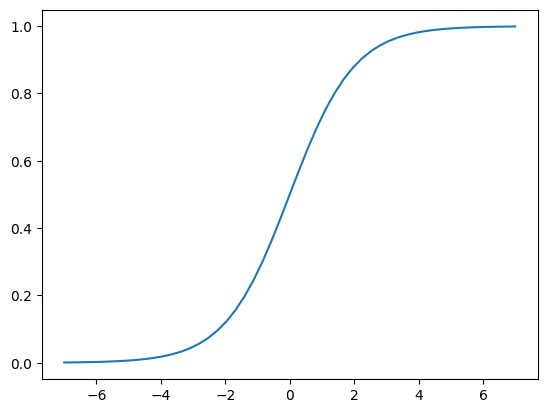

In [63]:
# Plot 'z' and 'sigmoid(z)'
plt.plot(z, sigmoid(z))
plt.show();

In [64]:
# Function of simple linear regression model
def linear_regression(xi):
    result = w0
    
    for j in range(len(x)):
        result = result + xi[j] * w[j]
    return result

In [65]:
# Function of logistic regression model
def logistic_regression(xi):
    score = w0
    
    for j in range(len(x)):
        score = result + xi[j] * w[j]
    
    result = sigmoid(score)
    return result

## 3.10 Training Logistic Regression with Scikit-Learn

- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
# Instantiate the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [68]:
# Access bias
model.intercept_[0]

-0.10900119300351918

In [69]:
# Access weigths
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [70]:
# Make hard predictions (return class labels)
model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 1])

In [71]:
# Make soft predictions (return probability between both labels)
y_pred = model.predict_proba(X_val)[:, 1] # we are only interested in second column (i.e., positive class)

In [72]:
# Set threshold (greater or equal to 0.5) as positive class
# for 'y_pred'
churn_decision = (y_pred >= 0.5).astype(int) # turn bool values to integers
churn_decision

array([0, 0, 0, ..., 0, 1, 1])

In [73]:
# Calculate the model accuracy by taking the mean
# where 'y_val' has same values as in 'churn_decision'
(y_val == churn_decision).mean()

0.8034066713981547

In [74]:
# Create prediction dataframe for easy comparison with 'y_val'
df_pred = pd.DataFrame({'probability': y_pred,
                       'prediction': churn_decision,
                       'actual': y_val})

df_pred

,probability,prediction,actual
0,0.008985,0,0
1,0.204662,0,0
2,0.212384,0,0
3,0.542996,1,1
4,0.213930,0,0
...,...,...,...
1404,0.313598,0,0
1405,0.039324,0,1
1406,0.136304,0,0
1407,0.799782,1,1


In [75]:
# Create column of correct values
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.008985,0,0,True
1,0.204662,0,0,True
2,0.212384,0,0,True
3,0.542996,1,1,True
4,0.213930,0,0,True
...,...,...,...,...
1404,0.313598,0,0,True
1405,0.039324,0,1,False
1406,0.136304,0,0,True
1407,0.799782,1,1,True


In [76]:
# Calculate accuracy on the 'correct' columns (which is same we have done earlier)
df_pred['correct'].mean()

0.8034066713981547

## 3.11 Model Interpretation

- Look at the coefficients
- Train a smaller model with fewer features

In [77]:
# Demonstrate how zip iterator works
a = [1, 2, 3, 4]
b = 'abcd'
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [78]:
# Get the list of feature names available in 'DictVictorizer'
dv.get_feature_names_out().tolist()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [79]:
# Get the model coefficients (weights)
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [80]:
# Zip the feature names with model coefficients
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


For understanding purpose of intercept and coefficients, let's create a smaller train set and fit the model on that.

In [81]:
# List of few columns
small = ['contract', 'tenure', 'monthlycharges']

# View 10 rows of 'df_train' subset and convert it to dictionary
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [82]:
# Create a subset of 'df_train' and convert it to dict
dicts_train_small = df_train[small].to_dict(orient='records')

# Instantiate DictVectorizer
dv_small = DictVectorizer(sparse=False)

# Fit the DictVectorizer to 'dicts_train_small'
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [83]:
# Extract feature name from 'dv_small'
dv_small.get_feature_names_out().tolist()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [84]:
# Transform 'dicts_train_small' to feature matrix 'X_train_small'
X_train_small = dv_small.transform(dicts_train_small)

In [85]:
# Instantiate Logistic Regression model
model_small = LogisticRegression()

# Train the model
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [86]:
# Access bias from 'model_small_intercept'
w0 = model_small.intercept_[0]
w0

-2.4767756588080787

In [87]:
# Access weight from 'model_small_intercept'
w = model_small.coef_[0].round(3)
w

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [88]:
# Zip feature names and coefficients and convert it to dict
dict(zip(dv_small.get_feature_names_out(), w))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

Let's manually calculate the weights and bias for each contract.

In [89]:
# Monthly contract, $30 monthlycharges, 24 months tenure
-2.47 + 1 * 0.97 + 30 * 0.027 + 24 * (-0.036)

-1.5540000000000003

In [90]:
# Calculate the churn rate
sigmoid(-1.5540000000000003)

0.1745092945325032

There is 17% chances that the above customer will churn.

In [91]:
# Yearly contract, $25 monthlycharges, 12 months tenure
-2.47 + 1 * (-0.025) + 25 * 0.027 + 12 * (-0.036)

-2.252

In [92]:
# Calculate the churn rate
sigmoid(-2.252)

0.09517708857202915

In [93]:
# Two years contract, $20 monthlycharges, 6 months tenure
-2.47 + 1 * (-0.949) + 20 * 0.027 + 6 * (-0.036)

-3.0949999999999998

In [94]:
# Calculate the churn rate
sigmoid(_) # '_' is the magic function to compute the last output in jupyter notebook

0.04331397184525773

## 3.12 Using the Model

- Train the logistic regression model on full dataset (train + validation)
- Make predictions on X_test
- Evaluate model on y_test
- Varify model accuracy using one sample from test data

In [95]:
# Combine 'categorical' and 'numerical' columns with 'df_full_train' data
# and convert it to dict
dict_full_train = df_full_train[categorical_cols + numerical_cols].to_dict(orient='records')

In [96]:
# Instantiate DictVectorizer
dv_full = DictVectorizer(sparse=False)

# Create feature matrix 'X_full_train' using fit and transform on 'dv_full'
X_full_train = dv_full.fit_transform(dict_full_train)

In [97]:
# Create 'y_full_train' vector
y_full_train = df_full_train.churn.values

In [98]:
# Create model
model = LogisticRegression()

# Train the model on 'X_full_train' and 'y_full_train'
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [99]:
# Combine 'categorical and numerical' columms for 'df_test'
# and convert it to dictionary
dict_test = df_test[categorical_cols + numerical_cols].to_dict(orient='records')

# Create feature matrix 'X_test' (do not use fit)
X_test = dv_full.transform(dict_test)

In [100]:
# Make prediction on 'X_test'
y_pred = model.predict_proba(X_test)[:, 1]

In [101]:
# Set threshold (greater or equal to 0.5) for 'y_pred'
churn_decision = y_pred >= 0.5

In [102]:
# Calculate accuracy on 'y_test'
(churn_decision == y_test).mean()

0.815471965933286

In [103]:
# Test model on the last customer in the test data for model validity
customer = dict_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [104]:
# Transform customer dict to feature matrix using DictVectorizer
X_small = dv_full.transform([customer]) # has to be a list
X_small

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0420e+02, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e+01, 1.7435e+03]])

In [105]:
# Make predictions on 'X_small'
model.predict_proba(X_small)[0, 1]

0.5968852088308868

The model says that this customer is more likely to churn. Let's confirm it from `y_test`.

In [106]:
# Extract last label in the 'y_test'
y_test[-1]

1

Indeed it is true.

## 3.13 Summary

- Feature importance - risk, mutual information, correlation
- One-hot encoding can be implemented with `DictVectorizer`
- Logistic regression - linear model like linear regression
- Output of logistic regression - probability
- Interpretation of weights is similar to linear regression

## 3.14 Explore More

**More things**

- Try to exclude least useful features

Use scikit-learn in project of last week

- Re-implement train/val/test split using scikit-learn in the project from the last week
- Also, instead of our own linear regression, use `LinearRegression` (not regularized) and `RidgeRegression` (regularized). Find the best regularization parameter for Ridge

Other projects

- Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
- Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients